In [1]:
import xarray as xr, matplotlib, matplotlib.pyplot as plt, cartopy, pandas as pd, numpy as np, re, glob, os, geopandas as gpd, regionmask
xr.set_options(keep_attrs = True)
matplotlib.rcParams['savefig.bbox'] = "tight"

from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta

from xarray.groupers import BinGrouper
from xhistogram.xarray import histogram
from matplotlib.patches import Rectangle
import matplotlib.colors as mcl

from IPython.display import clear_output

from geopy.geocoders import Nominatim

import statsmodels.nonparametric.smoothers_lowess as sm_lowess       # nonparametric smoother

import warnings; warnings.filterwarnings("ignore", category = FutureWarning)
import warnings; warnings.filterwarnings("ignore", category = UserWarning) # otherwise there will be a LOT of warnings about facecolours

mapproj = cartopy.crs.PlateCarree()

ERROR 1: PROJ: proj_create_from_database: Open of /rds/general/user/cb2714/home/miniforge3/envs/wwa/share/proj failed


In [2]:
sf_n = gpd.read_file("sf_northern")
sf_s = gpd.read_file("sf_southern")

# Maps of trend per grid cell

In [67]:
ev_date = "260126"
long_date = "January 26th"

# load the reconstructed maps - this has one variable for each of the outputs from the R trend fitting
res = xr.open_dataset("gridded-trend_rx1day-era5-"+ev_date+".nc").sel(lon = slice(-10,0), lat = slice(45,33))
# px_0204 = pd.read_csv("med-storms_reported-impacts.csv", index_col = 0).loc[["Cadiz, Spain", "Andalusia", "Malaga", "Gibraltar", "Larache", "Alentejo"]]

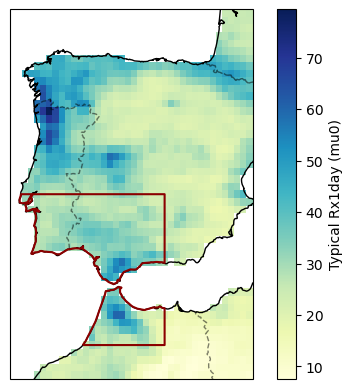

In [68]:
res.mu0.plot(subplot_kws = {"projection" : mapproj},
                cmap = "YlGnBu", 
                cbar_kwargs = {"location" : "right",
                               "label" : "Typical Rx1day (mu0)"}) 
ax = plt.gca()
ax.coastlines()
sf_s.boundary.plot(ax = ax, color = "darkred")
ax.add_feature(cartopy.feature.BORDERS, color = "k", alpha = 0.5, ls = "--")
# ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["left", "bottom"])


## Change in relative intensity

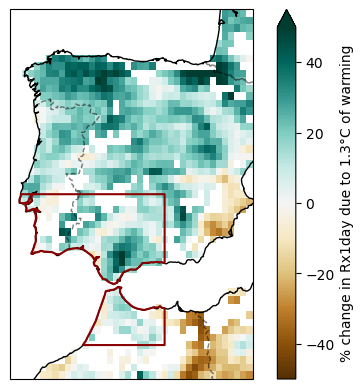

In [69]:
res.dI_rel_pi.plot(subplot_kws = {"projection" : mapproj},
                cmap = "BrBG", vmax = 50, vmin = -50,
                cbar_kwargs = {"location" : "right",
                               "label" : "% change in Rx1day due to 1.3°C of warming"}) 
ax = plt.gca()
ax.coastlines()
sf_s.boundary.plot(ax = ax, color = "darkred")
ax.add_feature(cartopy.feature.BORDERS, color = "k", alpha = 0.5, ls = "--")
# ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["left", "bottom"])
plt.savefig("fig/gridded-trend_dI-rel-pi_era5_gmst+nao.png")

<GeoAxes: xlabel='Longitude [degrees_east]', ylabel='Latitude [degrees_north]'>

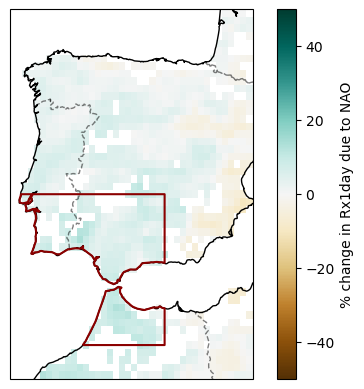

In [70]:
res.dI_rel_naoneutral.plot(subplot_kws = {"projection" : mapproj},
                cmap = "BrBG", vmax = 50, vmin = -50,
                cbar_kwargs = {"location" : "right",
                               "label" : "% change in Rx1day due to NAO"}) 
ax = plt.gca()
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color = "k", alpha = 0.5, ls = "--")
sf_s.boundary.plot(ax = ax, color = "darkred")

# ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["left", "bottom"])
# plt.savefig("fig/gridded-trend_dI-rel-naoneutral_era5_gmst+nao.png")

## Return period

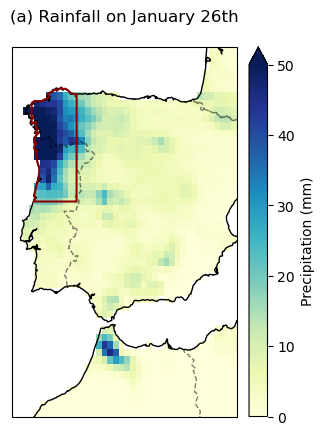

In [71]:
res.event_magnitude.plot(subplot_kws = {"projection" : mapproj},
                         cmap = "YlGnBu", vmax = 50,
                         cbar_kwargs = {"location" : "right",
                                        "pad" : 0.025,
                                        "label" : "Precipitation (mm)"}) 
ax = plt.gca()
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color = "k", alpha = 0.5, ls = "--")
sf_n.boundary.plot(ax = ax, color = "darkred")
# ax.scatter(px_0204.lon, px_0204.lat, marker = "o", facecolor = "gold", edgecolor = "k", zorder = 99)
ax.set_title("(a) Rainfall on "+long_date+"\n")

plt.savefig("fig/gridded-trend_ev"+ev_date+"_era5_gmst+nao.png")

In [ ]:
res.return_period.plot(subplot_kws = {"projection" : mapproj},
                cmap = "PuRd", norm = mcl.LogNorm(),
                cbar_kwargs = {"location" : "right",
                               "pad" : 0.025,
                               "label" : "Return period (years)"}) 
ax = plt.gca()
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color = "k", alpha = 0.5, ls = "--")
sf_n.boundary.plot(ax = ax, color = "darkred")
# ax.scatter(px_0204.lon, px_0204.lat, marker = "o", facecolor = "gold", edgecolor = "k", zorder = 99)
ax.set_title("(b) Return period of\nrainfall on "+long_date)

# ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["left", "bottom"])
plt.savefig("fig/gridded-trend_rp"+ev_date+"_era5_gmst+nao.png")

In [36]:
# save data for Tom
res.event_magnitude.to_netcdf("data/precip-260204.nc")
res.return_period.to_netcdf("data/returnperiod-260204.nc")
px_0204.to_csv("data/px-260204.csv")